In [124]:
#importing necessary packages
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score


In [3]:
#read the file
data=pd.read_csv("E:\\dataanalysis\\archive\\Job_Placement_Data.csv")

In [4]:
data.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [5]:
data.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [125]:
data.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [17]:
n=data.columns

In [12]:
data['status'] = data['status'].astype('category').cat.codes

In [13]:
data.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


In [73]:
for i in data.columns:
    if len(data[i].unique()):
        print(i)

gender
ssc_percentage
ssc_board
hsc_percentage
hsc_board
hsc_subject
degree_percentage
undergrad_degree
work_experience
emp_test_percentage
specialisation
mba_percent
status


In [50]:
len(data['ssc_board'].unique())

2

In [62]:
len(data['hsc_board'].unique())

2

In [63]:
len(data['undergrad_degree'].unique())

3

In [ ]:
data

In [65]:
len(data['specialisation'].unique())

2

In [14]:
data.dtypes

gender                  object
ssc_percentage         float64
ssc_board               object
hsc_percentage         float64
hsc_board               object
hsc_subject             object
degree_percentage      float64
undergrad_degree        object
work_experience         object
emp_test_percentage    float64
specialisation          object
mba_percent            float64
status                    int8
dtype: object

In [ ]:
labelencoder=preprocessing.LabelEncoder()#converting into categorical

In [70]:
for i in data.columns:
    if data[i].dtypes==object:
        if len(data[i].unique())<5:
            data[i]=labelencoder.fit_transform(data[i])
            
        
        
    

In [71]:
data.dtypes

gender                   int32
ssc_percentage         float64
ssc_board                int32
hsc_percentage         float64
hsc_board                int32
hsc_subject              int32
degree_percentage      float64
undergrad_degree         int32
work_experience          int32
emp_test_percentage    float64
specialisation           int32
mba_percent            float64
status                    int8
dtype: object

C:\Users\Dell\AppData\Local\Temp\ipykernel_18420\4046308907.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['status'], color='b', bins=100, hist_kws={'alpha': 0.4});


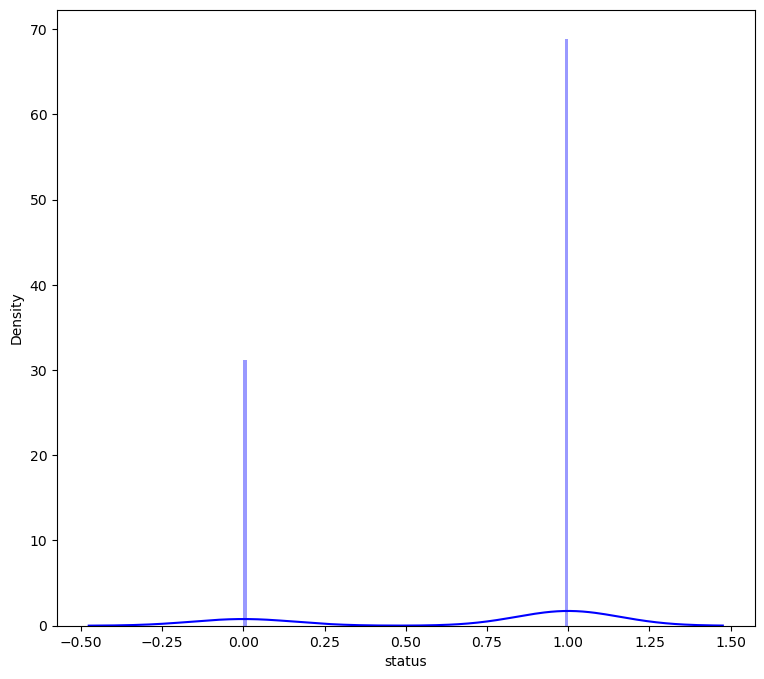

In [87]:
#plot the target
plt.figure(figsize=(9, 8))
sns.distplot(data['status'], color='b', bins=100, hist_kws={'alpha': 0.4});

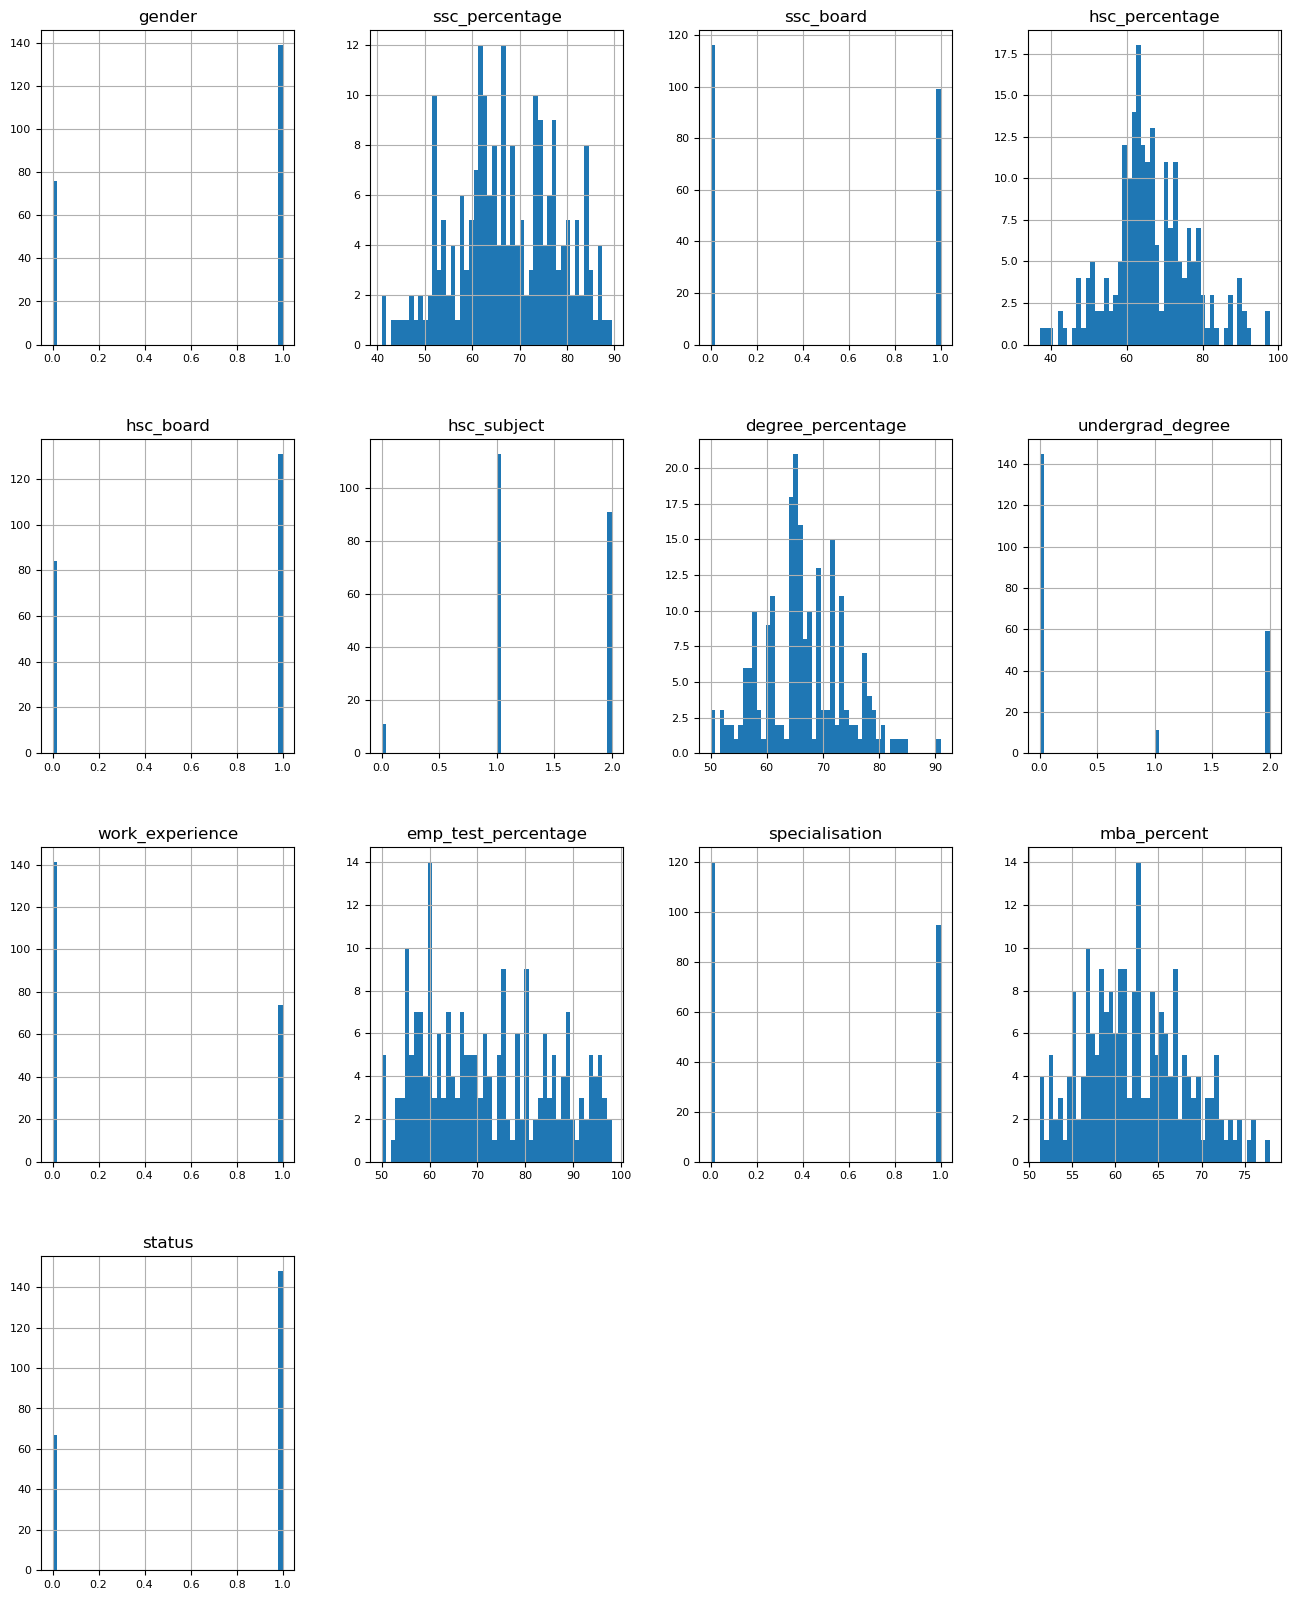

In [88]:
#plot all the columns
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [102]:
#taking the correlation
correlation = data.corr()['status'][:-1] # -1 because the latest row is SalePrice
golden_features_list = correlation[abs(correlation) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values statuswith SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values statuswith SalePrice:
ssc_percentage       0.607889
hsc_percentage       0.491228
degree_percentage    0.479861
Name: status, dtype: float64


In [103]:
y=data['status']

In [106]:
x=data[['ssc_percentage','hsc_percentage','degree_percentage']]

In [107]:
x

,ssc_percentage,hsc_percentage,degree_percentage
0,67.00,91.00,58.00
1,79.33,78.33,77.48
2,65.00,68.00,64.00
3,56.00,52.00,52.00
4,85.80,73.60,73.30
...,...,...,...
210,80.60,82.00,77.60
211,58.00,60.00,72.00
212,67.00,67.00,73.00
213,74.00,66.00,58.00


In [108]:
y

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int8

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)#splitting into train &test

In [112]:
model = LogisticRegression()


In [113]:
model.fit(x_train,y_train)#model building

LogisticRegression()

In [115]:
pred=model.predict(x_test)#prediction

In [117]:
accuracy = accuracy_score(y_test,pred)#accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


In [120]:
model=svm.SVC()

In [121]:
model.fit(x_train,y_train)

SVC()

In [122]:
preds=model.predict(x_test)

In [123]:
accuracy = accuracy_score(y_test,preds)
print("Accuracy:", accuracy)

Accuracy: 0.8518518518518519
